In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Import data </h1>

In [2]:
# combine all data table together into one dataframe
for i in range(1,71):
    if i == 1:
        patient = "01"
        filename = 'Diabetes-Data/data-'+ patient
        rawdata = pd.read_table(filename, names = ["date", "time","code", "value" ])
        rawdata['patient'] = patient
    else:
        if i < 10 and i != 1:
            patient = "0" + str(i)
        else:
            patient = str(i)
        filename = 'Diabetes-Data/data-' + patient
        temp = pd.read_table(filename, names = ["date", "time","code", "value" ])
        temp['patient'] = patient

        rawdata = pd.concat([rawdata, temp])

data = rawdata.copy()
data['patient'] = pd.to_numeric(data['patient'], errors='coerce', downcast="integer")

data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29330 entries, 0 to 340
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     29297 non-null  object
 1   time     29330 non-null  object
 2   code     29330 non-null  int64 
 3   value    29297 non-null  object
 4   patient  29330 non-null  int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 1.1+ MB


In [3]:
data.describe()

,code,patient
count,29330.000000,29330.000000
mean,46.428606,36.435152
std,13.453219,20.101179
min,0.000000,1.000000
25%,33.000000,21.000000
50%,48.000000,34.000000
75%,60.000000,55.000000
max,72.000000,70.000000


<h1>Data cleaning </h1>

In [4]:
# remove rows with missing values
data = data.dropna()

#drop non numeric values of "value" and change value from object to float, then drop N/A values
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data = data.dropna()
data['value'] = data['value'].astype(int) #note to self: insulin is maybe float???

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29256 entries, 0 to 340
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     29256 non-null  object
 1   time     29256 non-null  object
 2   code     29256 non-null  int64 
 3   value    29256 non-null  int64 
 4   patient  29256 non-null  int8  
dtypes: int64(2), int8(1), object(2)
memory usage: 1.1+ MB


In [5]:
# create timestamp variable (timeseries) and drop invalid date formats
#data['timestamp'] = data['date'] + ' ' + data['time']
data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29244 entries, 0 to 340
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       29244 non-null  object        
 1   time       29244 non-null  object        
 2   code       29244 non-null  int64         
 3   value      29244 non-null  int64         
 4   patient    29244 non-null  int8          
 5   timestamp  29244 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), int8(1), object(2)
memory usage: 1.4+ MB


In [6]:
data = data.groupby(['patient', 'timestamp'], as_index=False).agg({"time":list, "code":list, "value":list})
data

,patient,timestamp,time,code,value
0,1,1991-04-21 09:09:00,"[9:09, 9:09, 9:09]","[58, 33, 34]","[100, 9, 13]"
1,1,1991-04-21 17:08:00,"[17:08, 17:08]","[62, 33]","[119, 7]"
2,1,1991-04-21 22:51:00,[22:51],[48],[123]
3,1,1991-04-22 07:35:00,"[7:35, 7:35, 7:35]","[58, 33, 34]","[216, 10, 13]"
4,1,1991-04-22 13:40:00,[13:40],[33],[2]
...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,[22:00],[48],[145]
18315,70,1989-05-09 08:00:00,"[08:00, 08:00, 08:00]","[58, 33, 34]","[259, 1, 7]"
18316,70,1989-05-10 08:00:00,[08:00],[34],[7]
18317,70,1989-05-11 08:00:00,[08:00],[34],[7]


In [7]:
#convert time column into mins
data['time'] = data['timestamp'].apply(lambda x: x.hour*60 + x.minute)
data

,patient,timestamp,time,code,value
0,1,1991-04-21 09:09:00,549,"[58, 33, 34]","[100, 9, 13]"
1,1,1991-04-21 17:08:00,1028,"[62, 33]","[119, 7]"
2,1,1991-04-21 22:51:00,1371,[48],[123]
3,1,1991-04-22 07:35:00,455,"[58, 33, 34]","[216, 10, 13]"
4,1,1991-04-22 13:40:00,820,[33],[2]
...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,[48],[145]
18315,70,1989-05-09 08:00:00,480,"[58, 33, 34]","[259, 1, 7]"
18316,70,1989-05-10 08:00:00,480,[34],[7]
18317,70,1989-05-11 08:00:00,480,[34],[7]


In [8]:
# code arrays
codes_exercise = [69, 70, 71]
codes_insulin = [33, 34, 35]
codes_glucose_measurement = [48, 57, 58, 59, 60, 61, 62, 63, 64]
codes_meals = [66, 67, 68]
codes_other = [65, 72]

# init columns
#data['exercise'] = pd.Series(dtype='int') #column 5
#data['insulin'] = pd.Series(dtype='int') #column 6
#data['glucose'] = pd.Series(dtype='int') #column 7
#data['code_exercise'] = pd.Series(dtype='int') #column 8
#data['code_insulin'] = pd.Series(dtype='int') #column 9
#data['code_glucose'] = pd.Series(dtype='int') #column 10
#data['code_meal'] = pd.Series(dtype='int') #column 11
#data['code_other'] = pd.Series(dtype='int') #column 12

for data_index, codes in enumerate(data["code"]):
    counter = 0 

    for code in codes: #[row, column]

        if code in codes_meals:
            data.loc[data_index, 'code_meal'] = code

        elif code in codes_other:
            data.loc[data_index, 'code_other'] = code

        elif code in codes_exercise:
            data.loc[data_index, 'code_exercise'] = code
            if code == 69: #typical exercise activity
                data.loc[data_index, 'exercise'] = 2
            if code == 70: #more than normal ex activity
                data.loc[data_index, 'exercise'] = 3
            if code == 71: #less than normal ex activity
                data.loc[data_index, 'exercise'] = 1
            

        elif code in codes_insulin:
            data.loc[data_index, 'code_insulin'] = code
            data.loc[data_index, 'insulin'] = data["value"][data_index][counter]

        elif code in codes_glucose_measurement:
            data.loc[data_index, 'code_glucose'] = code
            data.loc[data_index, 'glucose'] = data["value"][data_index][counter]

        counter=+1

#data['exercise'] = data['exercise'].astype(int)
#data['insulin'] = data['insulin'].astype(int)

data

,patient,timestamp,time,code,value,code_glucose,glucose,code_insulin,insulin,code_other,code_meal,code_exercise,exercise
0,1,1991-04-21 09:09:00,549,"[58, 33, 34]","[100, 9, 13]",58.0,100.0,34.0,9.0,NaN,NaN,NaN,NaN
1,1,1991-04-21 17:08:00,1028,"[62, 33]","[119, 7]",62.0,119.0,33.0,7.0,NaN,NaN,NaN,NaN
2,1,1991-04-21 22:51:00,1371,[48],[123],48.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1991-04-22 07:35:00,455,"[58, 33, 34]","[216, 10, 13]",58.0,216.0,34.0,10.0,NaN,NaN,NaN,NaN
4,1,1991-04-22 13:40:00,820,[33],[2],NaN,NaN,33.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,[48],[145],48.0,145.0,NaN,NaN,NaN,NaN,NaN,NaN
18315,70,1989-05-09 08:00:00,480,"[58, 33, 34]","[259, 1, 7]",58.0,259.0,34.0,1.0,NaN,NaN,NaN,NaN
18316,70,1989-05-10 08:00:00,480,[34],[7],NaN,NaN,34.0,7.0,NaN,NaN,NaN,NaN
18317,70,1989-05-11 08:00:00,480,[34],[7],NaN,NaN,34.0,7.0,NaN,NaN,NaN,NaN


In [9]:
data = data.fillna({'glucose':'NaN'}).fillna(0)
data

,patient,timestamp,time,code,value,code_glucose,glucose,code_insulin,insulin,code_other,code_meal,code_exercise,exercise
0,1,1991-04-21 09:09:00,549,"[58, 33, 34]","[100, 9, 13]",58.0,100.0,34.0,9.0,0.0,0.0,0.0,0.0
1,1,1991-04-21 17:08:00,1028,"[62, 33]","[119, 7]",62.0,119.0,33.0,7.0,0.0,0.0,0.0,0.0
2,1,1991-04-21 22:51:00,1371,[48],[123],48.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1991-04-22 07:35:00,455,"[58, 33, 34]","[216, 10, 13]",58.0,216.0,34.0,10.0,0.0,0.0,0.0,0.0
4,1,1991-04-22 13:40:00,820,[33],[2],0.0,NaN,33.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,[48],[145],48.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0
18315,70,1989-05-09 08:00:00,480,"[58, 33, 34]","[259, 1, 7]",58.0,259.0,34.0,1.0,0.0,0.0,0.0,0.0
18316,70,1989-05-10 08:00:00,480,[34],[7],0.0,NaN,34.0,7.0,0.0,0.0,0.0,0.0
18317,70,1989-05-11 08:00:00,480,[34],[7],0.0,NaN,34.0,7.0,0.0,0.0,0.0,0.0


In [10]:
cols = ['code_glucose', 'code_insulin', 'insulin', 'code_other', 'code_meal', 'code_exercise', 'exercise']
data[cols] = data[cols].astype(int)
data

,patient,timestamp,time,code,value,code_glucose,glucose,code_insulin,insulin,code_other,code_meal,code_exercise,exercise
0,1,1991-04-21 09:09:00,549,"[58, 33, 34]","[100, 9, 13]",58,100.0,34,9,0,0,0,0
1,1,1991-04-21 17:08:00,1028,"[62, 33]","[119, 7]",62,119.0,33,7,0,0,0,0
2,1,1991-04-21 22:51:00,1371,[48],[123],48,123.0,0,0,0,0,0,0
3,1,1991-04-22 07:35:00,455,"[58, 33, 34]","[216, 10, 13]",58,216.0,34,10,0,0,0,0
4,1,1991-04-22 13:40:00,820,[33],[2],0,NaN,33,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,[48],[145],48,145.0,0,0,0,0,0,0
18315,70,1989-05-09 08:00:00,480,"[58, 33, 34]","[259, 1, 7]",58,259.0,34,1,0,0,0,0
18316,70,1989-05-10 08:00:00,480,[34],[7],0,NaN,34,7,0,0,0,0
18317,70,1989-05-11 08:00:00,480,[34],[7],0,NaN,34,7,0,0,0,0


In [11]:
#drop column code and value
data = data.drop(columns=['code', 'value'])
data

,patient,timestamp,time,code_glucose,glucose,code_insulin,insulin,code_other,code_meal,code_exercise,exercise
0,1,1991-04-21 09:09:00,549,58,100.0,34,9,0,0,0,0
1,1,1991-04-21 17:08:00,1028,62,119.0,33,7,0,0,0,0
2,1,1991-04-21 22:51:00,1371,48,123.0,0,0,0,0,0,0
3,1,1991-04-22 07:35:00,455,58,216.0,34,10,0,0,0,0
4,1,1991-04-22 13:40:00,820,0,NaN,33,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,48,145.0,0,0,0,0,0,0
18315,70,1989-05-09 08:00:00,480,58,259.0,34,1,0,0,0,0
18316,70,1989-05-10 08:00:00,480,0,NaN,34,7,0,0,0,0
18317,70,1989-05-11 08:00:00,480,0,NaN,34,7,0,0,0,0


In [12]:
# turn exercise codes into new exercise column
#conditions = [(data['code'] == 69), (data['code'] == 70), (data['code'] == 71)]
#choices = [2, 3, 1] #1 = less than normal, 2 = typical, 3 = more than normal
#data['exercise'] = np.select(conditions, choices, default=0)
    
#data

In [13]:
#turn insulin values into a new column
#conditions = [(data['code'] == 33), (data['code'] == 34), (data['code'] == 35)]
#choices = [data['value'], data['value'], data['value']]
#data['insulin_dose'] = np.select(conditions, choices, default=0)
#data

In [14]:
# turn blood glucose measurements into new column
#conditions = [(data['code'] == 48), (data['code'] == 57), (data['code'] == 58), 
              #(data['code'] == 59), (data['code'] == 60), (data['code'] == 61),
               #(data['code'] == 62), (data['code'] == 63), (data['code'] == 64)]
#choices = [data['value'], data['value'], data['value'],
           #data['value'], data['value'], data['value'],
           #data['value'], data['value'], data['value']]
#data['blood_glucose'] = np.select(conditions, choices, default=0)
#data

In [15]:
#df = data.groupby(['Datetime', "Subject"],as_index=False).agg({"Code":list, "Value":list})
#df = pd.concat([df,pd.DataFrame(columns = col_add)])
#data2 = pd.concat([data2, pd.DataFrame(columns = col_add)])

In [16]:
#data['daily_exercise'] = data.groupby(['date','patient'])["exercise"].transform('max')
#data

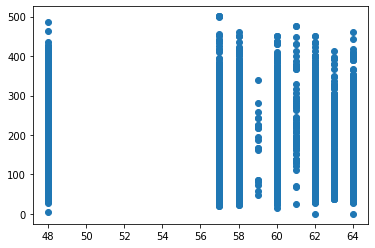

In [17]:
plt.scatter(data['code_glucose'], data['glucose'])

In [18]:
# example for 2 trainings a day
#data.iloc[4500:4530, :]

In [19]:
#data['blood_glucose'] = data.groupby(['timestamp','patient'])["blood_glucose"].transform('max')
#data['blood_glucose'] = data['blood_glucose'].replace(0, np.nan)

#idx = data.groupby(['date', 'time', 'patient'])['blood_glucose'].transform(max) == data['blood_glucose']
#data = data[idx]

#data

In [20]:
# drop all rows that have blood glucose = 0
data = data[data.glucose != 0]

data

,patient,timestamp,time,code_glucose,glucose,code_insulin,insulin,code_other,code_meal,code_exercise,exercise
0,1,1991-04-21 09:09:00,549,58,100.0,34,9,0,0,0,0
1,1,1991-04-21 17:08:00,1028,62,119.0,33,7,0,0,0,0
2,1,1991-04-21 22:51:00,1371,48,123.0,0,0,0,0,0,0
3,1,1991-04-22 07:35:00,455,58,216.0,34,10,0,0,0,0
4,1,1991-04-22 13:40:00,820,0,NaN,33,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18314,70,1989-05-08 22:00:00,1320,48,145.0,0,0,0,0,0,0
18315,70,1989-05-09 08:00:00,480,58,259.0,34,1,0,0,0,0
18316,70,1989-05-10 08:00:00,480,0,NaN,34,7,0,0,0,0
18317,70,1989-05-11 08:00:00,480,0,NaN,34,7,0,0,0,0


TypeError: '<=' not supported between instances of 'float' and 'str'

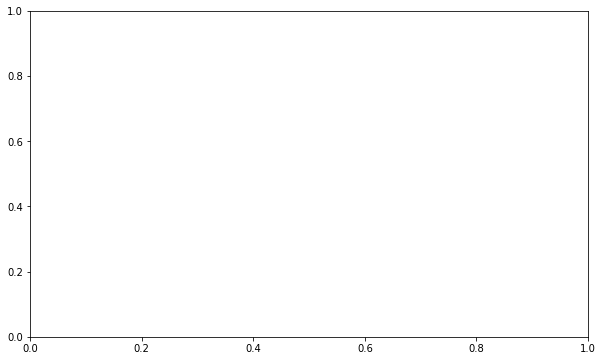

In [21]:
# plot blood glucose values
plt.figure(figsize=(10, 6))
data['glucose'].hist(bins=100)

Note to self: 
- add in report: data is crap bc doesn't even tell you what is the unit of blood sugar value

<h1>Data splitting </h1>

In [ ]:
#data = data.dropna()

X = data[['time', 'code', 'insulin_dose']]
y = data['blood_glucose']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
#regressor.fit(X_train, y_train)
# rdm forest regressor CLASSIFIES!!!! blood sugar is continuous!

<h1>Model</h1>

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#regr = linear_model.LinearRegression()
regr = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the Random Forest Regression model to the data
regr.fit(X_train, y_train)

<h1>Model evaluation </h1>

In [ ]:
# Predicting the target values of the test set
y_pred = regr.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
#print(r2_score(X_train, y_train))
#print(r2_score(X_test, y_test))
#print(regr.score(y_test, y_pred))

# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE: ",rmse)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#print ('Confusion Matrix:')
#print(confusion_matrix(y_test, y_pred))
#print('Accuracy Score:', accuracy_score(y_test, y_pred))
#print('Report:')
#print(classification_report(y_test, y_pred))

In [ ]:
# interested only in codes:
    #69 = Typical exercise activity
    #70 = More-than-usual exercise activity
    #71 = Less-than-usual exercise activity 
#training_data = data.loc[(data["exercise"] == 1) | (data["exercise"] == 2) | (data["exercise"] == 3)]
#training_data.head(30)


In [ ]:
plt.scatter(data['value'], data['daily_exercise'])

In [ ]:
plt.scatter(data['value'], data['time'])